# What do I need to do for the report?
1. BUild a model - how to build a model?
2. Know how to implement HMM - how?
3. Need to know the structure of data I'm dealing with (decide on pandas or numpy etc) - how?
4. Know how data is stored - how?
5. Extract read counts and store in some form - how?
6. Know how to extract and from where I can extract - how?
7. Think and look up where read counts can be extracted from - how?
8. Look at bam/SAM website & my bam files I have - how?
9. Update my bam files - how?
10. Run my REVISED code (by Clem, just * changed) - how?
11. Go to Beluga and type the command - how?
12. Log into MobaXTerm - how?
13. Bring my diary and type the pwd in - how?
14. Note down the password on my laptop, or I can't access without the diary

In [169]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.estimator import DNNClassifier
#from tensorflow.estimator.inputs import numpy_input_fn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.svm import LinearSVC
import sklearn
from matplotlib import pyplot as plt
import seaborn as sns

In [30]:
fin = "460_ALU_TypeREF_MELT2_GIAB_test-version.csv"

In [31]:
df = pd.read_csv(fin)
df = df.astype(str)
df

,CHR,START,STOP,TR1,TR1_REF,TR1_ALT,TR2,TR2_REF,TR2_ALT,MELT2,MELT2_GL,GIAB
0,1,104719865,104720170,0/1,31,7,0/1,35,12,0/1,"-75.4,-24.08,-317.81",0/1
1,1,145026747,145027058,0/1,116,39,0/1,173,50,0/1,"-174.03,-97.53,-1391.73",0/1
2,1,173944755,173945064,0/1,19,5,0/1,26,17,0/1,"-58,-19.87,-259.01",0/1
3,1,184937054,184937364,0/1,41,15,0/1,52,12,0/0,"-7.83,-31.91,-435.23",0/1
4,1,217917523,217917830,0/1,25,14,0/1,34,12,0/1,"-52.21,-25.89,-372.01",0/1
...,...,...,...,...,...,...,...,...,...,...,...,...
455,X,112877030,112877339,0/1,1,9,1/1,0,7,0/1,"-58,-16.26,-204.01",1/1
456,X,119643326,119643628,1/1,0,16,1/1,0,9,0/1,"-110.2,-25.29,-276.02",1/1
457,X,135157998,135158310,1/1,0,14,1/1,0,14,0/1,"-81.2,-15.65,-144.02",1/1
458,X,138384911,138385220,1/1,0,6,1/1,0,12,0/1,"-34.8,-12.64,-180.01",1/1


In [32]:
#df["merged_name"] = "chr" + df["CHR"] + ":" + df["START"] + "-" + df["STOP"]
df["merged_name"] = "chr" + df["CHR"] + ":" + df["START"].str[:6]
df["merged_name2"] = df["merged_name"].str[:10]
df["merged_name3"] = df["merged_name"].str[:9]
df

,CHR,START,STOP,TR1,TR1_REF,TR1_ALT,TR2,TR2_REF,TR2_ALT,MELT2,MELT2_GL,GIAB,merged_name,merged_name2,merged_name3
0,1,104719865,104720170,0/1,31,7,0/1,35,12,0/1,"-75.4,-24.08,-317.81",0/1,chr1:104719,chr1:10471,chr1:1047
1,1,145026747,145027058,0/1,116,39,0/1,173,50,0/1,"-174.03,-97.53,-1391.73",0/1,chr1:145026,chr1:14502,chr1:1450
2,1,173944755,173945064,0/1,19,5,0/1,26,17,0/1,"-58,-19.87,-259.01",0/1,chr1:173944,chr1:17394,chr1:1739
3,1,184937054,184937364,0/1,41,15,0/1,52,12,0/0,"-7.83,-31.91,-435.23",0/1,chr1:184937,chr1:18493,chr1:1849
4,1,217917523,217917830,0/1,25,14,0/1,34,12,0/1,"-52.21,-25.89,-372.01",0/1,chr1:217917,chr1:21791,chr1:2179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,X,112877030,112877339,0/1,1,9,1/1,0,7,0/1,"-58,-16.26,-204.01",1/1,chrX:112877,chrX:11287,chrX:1128
456,X,119643326,119643628,1/1,0,16,1/1,0,9,0/1,"-110.2,-25.29,-276.02",1/1,chrX:119643,chrX:11964,chrX:1196
457,X,135157998,135158310,1/1,0,14,1/1,0,14,0/1,"-81.2,-15.65,-144.02",1/1,chrX:135157,chrX:13515,chrX:1351
458,X,138384911,138385220,1/1,0,6,1/1,0,12,0/1,"-34.8,-12.64,-180.01",1/1,chrX:138384,chrX:13838,chrX:1383


In [33]:
df_01 = df[df["GIAB"] == "0/1"]
df_01["merged_name3"].to_csv("GIAB_460_10_loci_3.csv", index=False, header=False)

In [34]:
df_11 = df[df["GIAB"] == "1/1"]
df_11["merged_name3"].to_csv("GIAB_460_11_loci_3.csv", index=False, header=False)

In [35]:
df_01

,CHR,START,STOP,TR1,TR1_REF,TR1_ALT,TR2,TR2_REF,TR2_ALT,MELT2,MELT2_GL,GIAB,merged_name,merged_name2,merged_name3
0,1,104719865,104720170,0/1,31,7,0/1,35,12,0/1,"-75.4,-24.08,-317.81",0/1,chr1:104719,chr1:10471,chr1:1047
1,1,145026747,145027058,0/1,116,39,0/1,173,50,0/1,"-174.03,-97.53,-1391.73",0/1,chr1:145026,chr1:14502,chr1:1450
2,1,173944755,173945064,0/1,19,5,0/1,26,17,0/1,"-58,-19.87,-259.01",0/1,chr1:173944,chr1:17394,chr1:1739
3,1,184937054,184937364,0/1,41,15,0/1,52,12,0/0,"-7.83,-31.91,-435.23",0/1,chr1:184937,chr1:18493,chr1:1849
4,1,217917523,217917830,0/1,25,14,0/1,34,12,0/1,"-52.21,-25.89,-372.01",0/1,chr1:217917,chr1:21791,chr1:2179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,21,30601827,30602144,0/1,34,14,0/1,39,12,0/1,"-81.21,-32.51,-435.02",0/1,chr21:306018,chr21:3060,chr21:306
223,21,38961715,38961986,0/1,27,7,0/1,23,3,0/1,"-24.4,-17.46,-264.04",0/1,chr21:389617,chr21:3896,chr21:389
224,21,41586880,41587182,0/1,27,10,0/1,44,9,0/1,"-34.81,-18.66,-249.01",0/1,chr21:415868,chr21:4158,chr21:415
225,21,41957251,41957376,0/1,14,11,0/1,21,12,0/1,"-46.41,-25.29,-346.01",0/1,chr21:419572,chr21:4195,chr21:419


# Part 2

In [69]:
f00 = "GIAB_00_f2.csv"
f10 = "GIAB_10_f2.csv"
f11 = "GIAB_11_f2.csv"

In [70]:
df00 = pd.read_csv(f00, header=None)
df10 = pd.read_csv(f10, header=None)
df11 = pd.read_csv(f11, header=None)
df00 = df00.astype(str)
df10 = df10.astype(str)
df11 = df11.astype(str)
df00

,0
0,chr10:2402963-2403297/ 0/0 210 12 222
1,chr10:51539308-51539401/ 0/0 52 18 70
2,chr10:75969790-75970127/ 0/0 248 22 270
3,chr10:79764973-79765218/ 0/0 188 20 208
4,chr10:8516524-8516843/ 0/0 218 22 240
...,...
95,chr9:77503386-77503546/ 0/0 96 46 142
96,chrX:113850728-113851049/ 0/0 84 12 96
97,chrX:43238081-43238371/ 0/0 74 12 86
98,chrX:54290473-54290777/ 0/0 112 4 116


In [71]:
# split column into multiple columns by delimiter 
df00 = df00[0].str.split(' ', expand=True)
df10 = df10[0].str.split(' ', expand=True)
df11 = df11[0].str.split(' ', expand=True)

df00

,0,1,2,3,4
0,chr10:2402963-2403297/,0/0,210,12,222
1,chr10:51539308-51539401/,0/0,52,18,70
2,chr10:75969790-75970127/,0/0,248,22,270
3,chr10:79764973-79765218/,0/0,188,20,208
4,chr10:8516524-8516843/,0/0,218,22,240
...,...,...,...,...,...
95,chr9:77503386-77503546/,0/0,96,46,142
96,chrX:113850728-113851049/,0/0,84,12,96
97,chrX:43238081-43238371/,0/0,74,12,86
98,chrX:54290473-54290777/,0/0,112,4,116


In [72]:
df00.columns = ["dir_name", "GIAB_genotype", "f2_count_REF", "f2_count_ALT", "f2_count"]
df10.columns = ["dir_name", "GIAB_genotype", "f2_count_REF", "f2_count_ALT", "f2_count"]
df11.columns = ["dir_name", "GIAB_genotype", "f2_count_REF", "f2_count_ALT", "f2_count"]
df00

,dir_name,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
0,chr10:2402963-2403297/,0/0,210,12,222
1,chr10:51539308-51539401/,0/0,52,18,70
2,chr10:75969790-75970127/,0/0,248,22,270
3,chr10:79764973-79765218/,0/0,188,20,208
4,chr10:8516524-8516843/,0/0,218,22,240
...,...,...,...,...,...
95,chr9:77503386-77503546/,0/0,96,46,142
96,chrX:113850728-113851049/,0/0,84,12,96
97,chrX:43238081-43238371/,0/0,74,12,86
98,chrX:54290473-54290777/,0/0,112,4,116


In [73]:
dict_type_convert = {"f2_count_REF": int, "f2_count_ALT": int, "f2_count": int}
df00 = df00.astype(dict_type_convert)
df10 = df10.astype(dict_type_convert)
df11 = df11.astype(dict_type_convert)
# print(df00.dtypes)

In [74]:
frames = [df00, df10, df11]
df_560 = pd.concat(frames)
# Remove the '/' at the end of directory name
df_560["dir_name"] = df_560["dir_name"].str.split("/").str[0]
df_560

,dir_name,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
0,chr10:2402963-2403297,0/0,210,12,222
1,chr10:51539308-51539401,0/0,52,18,70
2,chr10:75969790-75970127,0/0,248,22,270
3,chr10:79764973-79765218,0/0,188,20,208
4,chr10:8516524-8516843,0/0,218,22,240
...,...,...,...,...,...
231,chrX:112877016-112877360,1/1,24,38,62
232,chrX:119643312-119643638,1/1,24,62,86
233,chrX:135157983-135158330,1/1,24,46,70
234,chrX:138384895-138385237,1/1,16,44,60


In [75]:
df_560.groupby(by="GIAB_genotype")["f2_count_REF"].mean()

GIAB_genotype
0/0    171.900000
1/0     90.348214
1/1     45.737288
Name: f2_count_REF, dtype: float64

In [76]:
df_560["GIAB_genotype"] = df_560["GIAB_genotype"].map({"0/0":0,
                             "1/0":1,
                             "1/1":2,
                             np.nan:3},
                             na_action=None)
df_560

,dir_name,GIAB_genotype,f2_count_REF,f2_count_ALT,f2_count
0,chr10:2402963-2403297,0,210,12,222
1,chr10:51539308-51539401,0,52,18,70
2,chr10:75969790-75970127,0,248,22,270
3,chr10:79764973-79765218,0,188,20,208
4,chr10:8516524-8516843,0,218,22,240
...,...,...,...,...,...
231,chrX:112877016-112877360,2,24,38,62
232,chrX:119643312-119643638,2,24,62,86
233,chrX:135157983-135158330,2,24,46,70
234,chrX:138384895-138385237,2,16,44,60


In [77]:
from sklearn import datasets

In [78]:
iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [82]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [101]:
y = df_560["GIAB_genotype"].to_numpy()
#y

In [86]:
X = df_560.iloc[:, 2:].to_numpy()

In [87]:
X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.2, random_state=42)
## Check out what "random_state=42" represents

In [100]:
clf = LinearSVC(penalty="l2", loss="squared_hinge", 
                dual=True, tol=0.0001, C=100, multi_class="ovr",
                fit_intercept=True, intercept_scaling=1, class_weight=None,
                verbose=0, random_state=0, max_iter=100000)
clf.fit(X_train, y_train)

print('Accuracy of linear SVC on training set: {:.3f}'.format(clf.score(X_train, y_train)))

print('Accuracy of linear SVC on test set: {:.3f}'.format(clf.score(X_test, y_test)))

Accuracy of linear SVC on training set: 0.766
Accuracy of linear SVC on test set: 0.705


C:\Users\Yumika\anaconda3-2\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [102]:
from sklearn import datasets
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelBinarizer
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [115]:
encoder = LabelBinarizer()
seed = 42

df_GIAB_2_X = pd.DataFrame(data=X, columns=["f2_count_REF", "f2_count_ALT", "f2_count"],
                       dtype=np.float32)
df_GIAB_2_X

,f2_count_REF,f2_count_ALT,f2_count
0,210.0,12.0,222.0
1,52.0,18.0,70.0
2,248.0,22.0,270.0
3,188.0,20.0,208.0
4,218.0,22.0,240.0
...,...,...,...
555,24.0,38.0,62.0
556,24.0,62.0,86.0
557,24.0,46.0,70.0
558,16.0,44.0,60.0


In [116]:
target = encoder.fit_transform(y)
df_GIAB_2_y = pd.DataFrame(data=target, columns=["0/0", "1/0", "1/1"])
df_GIAB_2_y

,0/0,1/0,1/1
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
555,0,0,1
556,0,0,1
557,0,0,1
558,0,0,1


In [136]:
X_train,X_test,y_train,y_test = train_test_split(df_GIAB_2_X,
                                                 df_GIAB_2_y,
                                                 test_size=0.20,
                                                 random_state=seed)
 
scaler = MinMaxScaler(feature_range=(0,1))
 
X_train = pd.DataFrame(scaler.fit_transform(X_train),
                               columns=X_train.columns,
                               index=X_train.index)
X_test = pd.DataFrame(scaler.transform(X_test),
                           columns=X_test.columns,
                           index=X_test.index)
 
def model():
    """build the Keras model callback"""
    model = Sequential()
    model.add(Dense(6, input_dim=3, activation='tanh', name='layer_1'))
    model.add(Dense(10, activation='tanh', name='layer_2'))
    model.add(Dense(3, activation='softmax', name='output_layer'))
     
    model.compile(loss="categorical_crossentropy",
                  optimizer="adam",
                  metrics=['accuracy'])
    return model
 
estimator = KerasClassifier(
        build_fn=model,
        epochs=200, batch_size=20,
        verbose=2)

<ipython-input-136-c7f27e87d569>:27: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  estimator = KerasClassifier(


In [157]:
history = estimator.fit(X_train, y_train)

Epoch 1/200
23/23 - 0s - loss: 1.0371 - accuracy: 0.5513 - 453ms/epoch - 20ms/step
Epoch 2/200
23/23 - 0s - loss: 0.9927 - accuracy: 0.5513 - 30ms/epoch - 1ms/step
Epoch 3/200
23/23 - 0s - loss: 0.9500 - accuracy: 0.5201 - 41ms/epoch - 2ms/step
Epoch 4/200
23/23 - 0s - loss: 0.9129 - accuracy: 0.5268 - 45ms/epoch - 2ms/step
Epoch 5/200
23/23 - 0s - loss: 0.8763 - accuracy: 0.5402 - 42ms/epoch - 2ms/step
Epoch 6/200
23/23 - 0s - loss: 0.8405 - accuracy: 0.5536 - 45ms/epoch - 2ms/step
Epoch 7/200
23/23 - 0s - loss: 0.8055 - accuracy: 0.6094 - 48ms/epoch - 2ms/step
Epoch 8/200
23/23 - 0s - loss: 0.7705 - accuracy: 0.6562 - 47ms/epoch - 2ms/step
Epoch 9/200
23/23 - 0s - loss: 0.7357 - accuracy: 0.6808 - 47ms/epoch - 2ms/step
Epoch 10/200
23/23 - 0s - loss: 0.7038 - accuracy: 0.7098 - 40ms/epoch - 2ms/step
Epoch 11/200
23/23 - 0s - loss: 0.6735 - accuracy: 0.7545 - 40ms/epoch - 2ms/step
Epoch 12/200
23/23 - 0s - loss: 0.6460 - accuracy: 0.7812 - 49ms/epoch - 2ms/step
Epoch 13/200
23/23 - 0s

Epoch 101/200
23/23 - 0s - loss: 0.3436 - accuracy: 0.8929 - 37ms/epoch - 2ms/step
Epoch 102/200
23/23 - 0s - loss: 0.3425 - accuracy: 0.8973 - 34ms/epoch - 1ms/step
Epoch 103/200
23/23 - 0s - loss: 0.3416 - accuracy: 0.8929 - 36ms/epoch - 2ms/step
Epoch 104/200
23/23 - 0s - loss: 0.3416 - accuracy: 0.8951 - 40ms/epoch - 2ms/step
Epoch 105/200
23/23 - 0s - loss: 0.3396 - accuracy: 0.8951 - 38ms/epoch - 2ms/step
Epoch 106/200
23/23 - 0s - loss: 0.3381 - accuracy: 0.8951 - 41ms/epoch - 2ms/step
Epoch 107/200
23/23 - 0s - loss: 0.3379 - accuracy: 0.8929 - 37ms/epoch - 2ms/step
Epoch 108/200
23/23 - 0s - loss: 0.3366 - accuracy: 0.8951 - 34ms/epoch - 1ms/step
Epoch 109/200
23/23 - 0s - loss: 0.3347 - accuracy: 0.8951 - 36ms/epoch - 2ms/step
Epoch 110/200
23/23 - 0s - loss: 0.3327 - accuracy: 0.8929 - 36ms/epoch - 2ms/step
Epoch 111/200
23/23 - 0s - loss: 0.3324 - accuracy: 0.8906 - 41ms/epoch - 2ms/step
Epoch 112/200
23/23 - 0s - loss: 0.3320 - accuracy: 0.8929 - 37ms/epoch - 2ms/step
Epoc

Epoch 200/200
23/23 - 0s - loss: 0.2574 - accuracy: 0.8996 - 35ms/epoch - 2ms/step


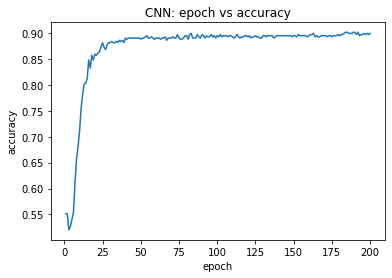

In [174]:
lst_epoch = [i for i in range(1, 201)]
#print(lst_epoch)
lst_accuracy = history.history['accuracy']
plt.title("CNN: epoch vs accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.plot(lst_epoch, lst_accuracy) 


In [164]:
print(history.params)
history.history['loss']
#history.history['accuracy']
# check the keys of history object
#print(history.history)

{'verbose': 2, 'epochs': 200, 'steps': 23}


[1.0371313095092773,
 0.9926669001579285,
 0.9499611258506775,
 0.9128750562667847,
 0.8763155341148376,
 0.8404956459999084,
 0.8055056929588318,
 0.770469605922699,
 0.735694944858551,
 0.7038083672523499,
 0.6734943985939026,
 0.6459881663322449,
 0.6224268674850464,
 0.599740207195282,
 0.5807595252990723,
 0.5636609792709351,
 0.5485864877700806,
 0.5366576910018921,
 0.5234610438346863,
 0.5122732520103455,
 0.5026963353157043,
 0.4941125810146332,
 0.4868190586566925,
 0.47876986861228943,
 0.4725210666656494,
 0.4655890166759491,
 0.46021562814712524,
 0.45498743653297424,
 0.4507310092449188,
 0.44571390748023987,
 0.4414360821247101,
 0.43806925415992737,
 0.43425852060317993,
 0.43099358677864075,
 0.42787647247314453,
 0.42539331316947937,
 0.4223697781562805,
 0.4190939962863922,
 0.4178408086299896,
 0.41446423530578613,
 0.4124818444252014,
 0.41066399216651917,
 0.4093141257762909,
 0.40735360980033875,
 0.4053010642528534,
 0.4029618203639984,
 0.4016278386116028,
 0.4

In [140]:
from tensorflow.keras.losses import MeanSquaredError

In [147]:
model2 = Sequential()
model2.add(Dense(6, input_dim=3, activation='tanh', name='layer_1'))
model2.add(Dense(10, activation='tanh', name='layer_2'))
model2.add(Dense(3, activation='softmax', name='output_layer'))

model2.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

In [153]:
model().fit(X_train, y_train, epochs=200)

Epoch 1/200
14/14 [==============================] - 0s 1ms/step - loss: 1.0808 - accuracy: 0.4040
Epoch 2/200
14/14 [==============================] - 0s 2ms/step - loss: 1.0462 - accuracy: 0.5536
Epoch 3/200
14/14 [==============================] - 0s 2ms/step - loss: 1.0177 - accuracy: 0.4665
Epoch 4/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9928 - accuracy: 0.4464
Epoch 5/200
14/14 [==============================] - 0s 3ms/step - loss: 0.9715 - accuracy: 0.4420
Epoch 6/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9511 - accuracy: 0.4330
Epoch 7/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9310 - accuracy: 0.4710
Epoch 8/200
14/14 [==============================] - 0s 2ms/step - loss: 0.9099 - accuracy: 0.5000
Epoch 9/200
14/14 [==============================] - 0s 2ms/step - loss: 0.8885 - accuracy: 0.5268
Epoch 10/200
14/14 [==============================] - 0s 3ms/step - loss: 0.8659 - accuracy: 0.5446
Epoch 11/

14/14 [==============================] - 0s 3ms/step - loss: 0.3746 - accuracy: 0.8929
Epoch 84/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3736 - accuracy: 0.8929
Epoch 85/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3739 - accuracy: 0.8929
Epoch 86/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3735 - accuracy: 0.8951
Epoch 87/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3718 - accuracy: 0.8951
Epoch 88/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3712 - accuracy: 0.8951
Epoch 89/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3701 - accuracy: 0.8973
Epoch 90/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3694 - accuracy: 0.8929
Epoch 91/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3684 - accuracy: 0.8929
Epoch 92/200
14/14 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8951
Epoch 93/200


In [154]:
model().predict(X_test)
#score = model.evaluate(x_test, y_test, verbose = 0) 

array([[0.35143083, 0.3101015 , 0.3384677 ],
       [0.35058483, 0.31977853, 0.32963666],
       [0.36764666, 0.31739196, 0.3149614 ],
       [0.41038913, 0.30581847, 0.28379238],
       [0.3666395 , 0.32113647, 0.31222406],
       [0.35949674, 0.3189964 , 0.3215069 ],
       [0.35949674, 0.3189964 , 0.3215069 ],
       [0.3690001 , 0.31361875, 0.3173811 ],
       [0.38795707, 0.3064824 , 0.30556053],
       [0.3530614 , 0.3133272 , 0.33361137],
       [0.35309342, 0.3145192 , 0.33238742],
       [0.36022666, 0.31481218, 0.32496122],
       [0.37300417, 0.3131188 , 0.31387708],
       [0.3850374 , 0.31192124, 0.3030414 ],
       [0.39070615, 0.3122359 , 0.29705793],
       [0.37692645, 0.30927134, 0.31380227],
       [0.35919368, 0.3228849 , 0.31792146],
       [0.37998733, 0.31126192, 0.30875072],
       [0.36911333, 0.3145319 , 0.31635484],
       [0.3666951 , 0.31479093, 0.3185139 ],
       [0.34921134, 0.3156897 , 0.33509895],
       [0.40181854, 0.30830324, 0.28987822],
       [0.

In [155]:
model().evaluate(X_test, y_test)

4/4 [==============================] - 0s 3ms/step - loss: 1.1557 - accuracy: 0.0446


[1.1556947231292725, 0.0446428582072258]

In [ ]:
pred_for_val = estimator.predict(dtest_for_val_ini)

In [123]:
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Model Performance: mean: %.2f%% std: (%.2f%%)" % (results.mean()*100, results.std()*100))

Epoch 1/200
18/18 - 0s - loss: 1.1405 - accuracy: 0.3939 - 418ms/epoch - 23ms/step
Epoch 2/200
18/18 - 0s - loss: 1.0937 - accuracy: 0.3939 - 23ms/epoch - 1ms/step
Epoch 3/200
18/18 - 0s - loss: 1.0530 - accuracy: 0.4302 - 34ms/epoch - 2ms/step
Epoch 4/200
18/18 - 0s - loss: 1.0144 - accuracy: 0.6704 - 31ms/epoch - 2ms/step
Epoch 5/200
18/18 - 0s - loss: 0.9794 - accuracy: 0.7346 - 33ms/epoch - 2ms/step
Epoch 6/200
18/18 - 0s - loss: 0.9439 - accuracy: 0.6816 - 30ms/epoch - 2ms/step
Epoch 7/200
18/18 - 0s - loss: 0.9104 - accuracy: 0.6704 - 28ms/epoch - 2ms/step
Epoch 8/200
18/18 - 0s - loss: 0.8790 - accuracy: 0.6508 - 33ms/epoch - 2ms/step
Epoch 9/200
18/18 - 0s - loss: 0.8455 - accuracy: 0.6564 - 31ms/epoch - 2ms/step
Epoch 10/200
18/18 - 0s - loss: 0.8138 - accuracy: 0.6620 - 33ms/epoch - 2ms/step
Epoch 11/200
18/18 - 0s - loss: 0.7837 - accuracy: 0.6536 - 31ms/epoch - 2ms/step
Epoch 12/200
18/18 - 0s - loss: 0.7529 - accuracy: 0.6592 - 31ms/epoch - 2ms/step
Epoch 13/200
18/18 - 0s

Epoch 101/200
18/18 - 0s - loss: 0.3193 - accuracy: 0.9106 - 31ms/epoch - 2ms/step
Epoch 102/200
18/18 - 0s - loss: 0.3185 - accuracy: 0.9106 - 36ms/epoch - 2ms/step
Epoch 103/200
18/18 - 0s - loss: 0.3184 - accuracy: 0.9106 - 36ms/epoch - 2ms/step
Epoch 104/200
18/18 - 0s - loss: 0.3175 - accuracy: 0.9078 - 33ms/epoch - 2ms/step
Epoch 105/200
18/18 - 0s - loss: 0.3166 - accuracy: 0.9106 - 29ms/epoch - 2ms/step
Epoch 106/200
18/18 - 0s - loss: 0.3152 - accuracy: 0.9106 - 35ms/epoch - 2ms/step
Epoch 107/200
18/18 - 0s - loss: 0.3146 - accuracy: 0.9106 - 35ms/epoch - 2ms/step
Epoch 108/200
18/18 - 0s - loss: 0.3135 - accuracy: 0.9106 - 32ms/epoch - 2ms/step
Epoch 109/200
18/18 - 0s - loss: 0.3135 - accuracy: 0.9078 - 31ms/epoch - 2ms/step
Epoch 110/200
18/18 - 0s - loss: 0.3117 - accuracy: 0.9106 - 32ms/epoch - 2ms/step
Epoch 111/200
18/18 - 0s - loss: 0.3122 - accuracy: 0.9106 - 34ms/epoch - 2ms/step
Epoch 112/200
18/18 - 0s - loss: 0.3101 - accuracy: 0.9106 - 29ms/epoch - 2ms/step
Epoc

Epoch 200/200
18/18 - 0s - loss: 0.2579 - accuracy: 0.9078 - 38ms/epoch - 2ms/step
5/5 - 0s - loss: 0.3656 - accuracy: 0.8444 - 244ms/epoch - 49ms/step
Epoch 1/200
18/18 - 1s - loss: 1.1397 - accuracy: 0.4358 - 550ms/epoch - 31ms/step
Epoch 2/200
18/18 - 0s - loss: 1.0825 - accuracy: 0.4330 - 27ms/epoch - 1ms/step
Epoch 3/200
18/18 - 0s - loss: 1.0390 - accuracy: 0.4274 - 30ms/epoch - 2ms/step
Epoch 4/200
18/18 - 0s - loss: 1.0047 - accuracy: 0.4274 - 30ms/epoch - 2ms/step
Epoch 5/200
18/18 - 0s - loss: 0.9769 - accuracy: 0.4246 - 27ms/epoch - 1ms/step
Epoch 6/200
18/18 - 0s - loss: 0.9512 - accuracy: 0.4497 - 28ms/epoch - 2ms/step
Epoch 7/200
18/18 - 0s - loss: 0.9273 - accuracy: 0.4777 - 28ms/epoch - 2ms/step
Epoch 8/200
18/18 - 0s - loss: 0.9035 - accuracy: 0.5335 - 31ms/epoch - 2ms/step
Epoch 9/200
18/18 - 0s - loss: 0.8790 - accuracy: 0.5838 - 25ms/epoch - 1ms/step
Epoch 10/200
18/18 - 0s - loss: 0.8546 - accuracy: 0.5866 - 33ms/epoch - 2ms/step
Epoch 11/200
18/18 - 0s - loss: 0.8

Epoch 100/200
18/18 - 0s - loss: 0.3432 - accuracy: 0.8855 - 28ms/epoch - 2ms/step
Epoch 101/200
18/18 - 0s - loss: 0.3396 - accuracy: 0.8911 - 31ms/epoch - 2ms/step
Epoch 102/200
18/18 - 0s - loss: 0.3395 - accuracy: 0.8911 - 29ms/epoch - 2ms/step
Epoch 103/200
18/18 - 0s - loss: 0.3376 - accuracy: 0.8911 - 33ms/epoch - 2ms/step
Epoch 104/200
18/18 - 0s - loss: 0.3359 - accuracy: 0.8911 - 32ms/epoch - 2ms/step
Epoch 105/200
18/18 - 0s - loss: 0.3343 - accuracy: 0.8939 - 27ms/epoch - 1ms/step
Epoch 106/200
18/18 - 0s - loss: 0.3349 - accuracy: 0.8855 - 30ms/epoch - 2ms/step
Epoch 107/200
18/18 - 0s - loss: 0.3307 - accuracy: 0.8939 - 27ms/epoch - 2ms/step
Epoch 108/200
18/18 - 0s - loss: 0.3302 - accuracy: 0.8939 - 30ms/epoch - 2ms/step
Epoch 109/200
18/18 - 0s - loss: 0.3285 - accuracy: 0.8966 - 29ms/epoch - 2ms/step
Epoch 110/200
18/18 - 0s - loss: 0.3273 - accuracy: 0.8966 - 28ms/epoch - 2ms/step
Epoch 111/200
18/18 - 0s - loss: 0.3246 - accuracy: 0.8966 - 27ms/epoch - 2ms/step
Epoc

Epoch 199/200
18/18 - 0s - loss: 0.2597 - accuracy: 0.8966 - 28ms/epoch - 2ms/step
Epoch 200/200
18/18 - 0s - loss: 0.2592 - accuracy: 0.8966 - 31ms/epoch - 2ms/step
5/5 - 0s - loss: 0.2478 - accuracy: 0.9000 - 268ms/epoch - 54ms/step
Epoch 1/200
18/18 - 0s - loss: 1.1079 - accuracy: 0.4246 - 493ms/epoch - 27ms/step
Epoch 2/200
18/18 - 0s - loss: 1.0660 - accuracy: 0.4274 - 27ms/epoch - 1ms/step
Epoch 3/200
18/18 - 0s - loss: 1.0319 - accuracy: 0.4274 - 26ms/epoch - 1ms/step
Epoch 4/200
18/18 - 0s - loss: 1.0049 - accuracy: 0.4385 - 35ms/epoch - 2ms/step
Epoch 5/200
18/18 - 0s - loss: 0.9799 - accuracy: 0.6397 - 66ms/epoch - 4ms/step
Epoch 6/200
18/18 - 0s - loss: 0.9564 - accuracy: 0.7877 - 48ms/epoch - 3ms/step
Epoch 7/200
18/18 - 0s - loss: 0.9323 - accuracy: 0.7821 - 45ms/epoch - 2ms/step
Epoch 8/200
18/18 - 0s - loss: 0.9084 - accuracy: 0.7765 - 45ms/epoch - 2ms/step
Epoch 9/200
18/18 - 0s - loss: 0.8873 - accuracy: 0.7039 - 59ms/epoch - 3ms/step
Epoch 10/200
18/18 - 0s - loss: 0.

Epoch 99/200
18/18 - 0s - loss: 0.3644 - accuracy: 0.8939 - 52ms/epoch - 3ms/step
Epoch 100/200
18/18 - 0s - loss: 0.3647 - accuracy: 0.8883 - 51ms/epoch - 3ms/step
Epoch 101/200
18/18 - 0s - loss: 0.3634 - accuracy: 0.8911 - 36ms/epoch - 2ms/step
Epoch 102/200
18/18 - 0s - loss: 0.3633 - accuracy: 0.8966 - 31ms/epoch - 2ms/step
Epoch 103/200
18/18 - 0s - loss: 0.3617 - accuracy: 0.8883 - 31ms/epoch - 2ms/step
Epoch 104/200
18/18 - 0s - loss: 0.3615 - accuracy: 0.8883 - 31ms/epoch - 2ms/step
Epoch 105/200
18/18 - 0s - loss: 0.3610 - accuracy: 0.8939 - 46ms/epoch - 3ms/step
Epoch 106/200
18/18 - 0s - loss: 0.3601 - accuracy: 0.8966 - 38ms/epoch - 2ms/step
Epoch 107/200
18/18 - 0s - loss: 0.3595 - accuracy: 0.8911 - 88ms/epoch - 5ms/step
Epoch 108/200
18/18 - 0s - loss: 0.3603 - accuracy: 0.8911 - 44ms/epoch - 2ms/step
Epoch 109/200
18/18 - 0s - loss: 0.3590 - accuracy: 0.8966 - 44ms/epoch - 2ms/step
Epoch 110/200
18/18 - 0s - loss: 0.3594 - accuracy: 0.8994 - 40ms/epoch - 2ms/step
Epoch

Epoch 198/200
18/18 - 0s - loss: 0.3063 - accuracy: 0.8939 - 19ms/epoch - 1ms/step
Epoch 199/200
18/18 - 0s - loss: 0.3074 - accuracy: 0.8939 - 20ms/epoch - 1ms/step
Epoch 200/200
18/18 - 0s - loss: 0.3054 - accuracy: 0.8939 - 19ms/epoch - 1ms/step
5/5 - 0s - loss: 0.3254 - accuracy: 0.9000 - 248ms/epoch - 50ms/step
Epoch 1/200
18/18 - 1s - loss: 1.0960 - accuracy: 0.5655 - 534ms/epoch - 30ms/step
Epoch 2/200
18/18 - 0s - loss: 1.0574 - accuracy: 0.5599 - 18ms/epoch - 1ms/step
Epoch 3/200
18/18 - 0s - loss: 1.0219 - accuracy: 0.5348 - 20ms/epoch - 1ms/step
Epoch 4/200
18/18 - 0s - loss: 0.9894 - accuracy: 0.5292 - 24ms/epoch - 1ms/step
Epoch 5/200
18/18 - 0s - loss: 0.9582 - accuracy: 0.5265 - 43ms/epoch - 2ms/step
Epoch 6/200
18/18 - 0s - loss: 0.9284 - accuracy: 0.5209 - 58ms/epoch - 3ms/step
Epoch 7/200
18/18 - 0s - loss: 0.8990 - accuracy: 0.5265 - 40ms/epoch - 2ms/step
Epoch 8/200
18/18 - 0s - loss: 0.8695 - accuracy: 0.5320 - 21ms/epoch - 1ms/step
Epoch 9/200
18/18 - 0s - loss: 0

Epoch 98/200
18/18 - 0s - loss: 0.3579 - accuracy: 0.8942 - 21ms/epoch - 1ms/step
Epoch 99/200
18/18 - 0s - loss: 0.3553 - accuracy: 0.9025 - 22ms/epoch - 1ms/step
Epoch 100/200
18/18 - 0s - loss: 0.3544 - accuracy: 0.9025 - 22ms/epoch - 1ms/step
Epoch 101/200
18/18 - 0s - loss: 0.3540 - accuracy: 0.8997 - 21ms/epoch - 1ms/step
Epoch 102/200
18/18 - 0s - loss: 0.3556 - accuracy: 0.8997 - 22ms/epoch - 1ms/step
Epoch 103/200
18/18 - 0s - loss: 0.3538 - accuracy: 0.8997 - 21ms/epoch - 1ms/step
Epoch 104/200
18/18 - 0s - loss: 0.3523 - accuracy: 0.8997 - 22ms/epoch - 1ms/step
Epoch 105/200
18/18 - 0s - loss: 0.3515 - accuracy: 0.8997 - 23ms/epoch - 1ms/step
Epoch 106/200
18/18 - 0s - loss: 0.3513 - accuracy: 0.8997 - 21ms/epoch - 1ms/step
Epoch 107/200
18/18 - 0s - loss: 0.3498 - accuracy: 0.8997 - 22ms/epoch - 1ms/step
Epoch 108/200
18/18 - 0s - loss: 0.3494 - accuracy: 0.8969 - 24ms/epoch - 1ms/step
Epoch 109/200
18/18 - 0s - loss: 0.3484 - accuracy: 0.8997 - 24ms/epoch - 1ms/step
Epoch 

Epoch 197/200
18/18 - 0s - loss: 0.2809 - accuracy: 0.8942 - 24ms/epoch - 1ms/step
Epoch 198/200
18/18 - 0s - loss: 0.2799 - accuracy: 0.8914 - 27ms/epoch - 2ms/step
Epoch 199/200
18/18 - 0s - loss: 0.2802 - accuracy: 0.8942 - 25ms/epoch - 1ms/step
Epoch 200/200
18/18 - 0s - loss: 0.2784 - accuracy: 0.8942 - 26ms/epoch - 1ms/step
5/5 - 0s - loss: 0.2968 - accuracy: 0.8989 - 158ms/epoch - 32ms/step
Epoch 1/200
18/18 - 1s - loss: 1.0460 - accuracy: 0.3983 - 580ms/epoch - 32ms/step
Epoch 2/200
18/18 - 0s - loss: 1.0242 - accuracy: 0.4206 - 23ms/epoch - 1ms/step
Epoch 3/200
18/18 - 0s - loss: 1.0056 - accuracy: 0.5850 - 23ms/epoch - 1ms/step
Epoch 4/200
18/18 - 0s - loss: 0.9884 - accuracy: 0.6212 - 22ms/epoch - 1ms/step
Epoch 5/200
18/18 - 0s - loss: 0.9705 - accuracy: 0.5487 - 23ms/epoch - 1ms/step
Epoch 6/200
18/18 - 0s - loss: 0.9512 - accuracy: 0.5237 - 23ms/epoch - 1ms/step
Epoch 7/200
18/18 - 0s - loss: 0.9285 - accuracy: 0.5070 - 23ms/epoch - 1ms/step
Epoch 8/200
18/18 - 0s - loss:

Epoch 97/200
18/18 - 0s - loss: 0.3698 - accuracy: 0.8886 - 31ms/epoch - 2ms/step
Epoch 98/200
18/18 - 0s - loss: 0.3694 - accuracy: 0.8858 - 30ms/epoch - 2ms/step
Epoch 99/200
18/18 - 0s - loss: 0.3684 - accuracy: 0.8886 - 28ms/epoch - 2ms/step
Epoch 100/200
18/18 - 0s - loss: 0.3683 - accuracy: 0.8886 - 22ms/epoch - 1ms/step
Epoch 101/200
18/18 - 0s - loss: 0.3671 - accuracy: 0.8886 - 22ms/epoch - 1ms/step
Epoch 102/200
18/18 - 0s - loss: 0.3665 - accuracy: 0.8886 - 24ms/epoch - 1ms/step
Epoch 103/200
18/18 - 0s - loss: 0.3662 - accuracy: 0.8886 - 23ms/epoch - 1ms/step
Epoch 104/200
18/18 - 0s - loss: 0.3660 - accuracy: 0.8886 - 29ms/epoch - 2ms/step
Epoch 105/200
18/18 - 0s - loss: 0.3649 - accuracy: 0.8914 - 30ms/epoch - 2ms/step
Epoch 106/200
18/18 - 0s - loss: 0.3644 - accuracy: 0.8914 - 36ms/epoch - 2ms/step
Epoch 107/200
18/18 - 0s - loss: 0.3647 - accuracy: 0.8914 - 30ms/epoch - 2ms/step
Epoch 108/200
18/18 - 0s - loss: 0.3648 - accuracy: 0.8886 - 35ms/epoch - 2ms/step
Epoch 1

Epoch 196/200
18/18 - 0s - loss: 0.2902 - accuracy: 0.8969 - 25ms/epoch - 1ms/step
Epoch 197/200
18/18 - 0s - loss: 0.2892 - accuracy: 0.8969 - 22ms/epoch - 1ms/step
Epoch 198/200
18/18 - 0s - loss: 0.2891 - accuracy: 0.8969 - 25ms/epoch - 1ms/step
Epoch 199/200
18/18 - 0s - loss: 0.2878 - accuracy: 0.8969 - 28ms/epoch - 2ms/step
Epoch 200/200
18/18 - 0s - loss: 0.2875 - accuracy: 0.8942 - 24ms/epoch - 1ms/step
5/5 - 0s - loss: 0.2771 - accuracy: 0.8876 - 171ms/epoch - 34ms/step
Model Performance: mean: 88.62% std: (2.14%)


In [119]:
results

array([0.86666667, 0.91111112, 0.89999998, 0.89887643, 0.87640452])